In [1]:
import pandas as pd

In [24]:
df = pd.read_csv('data/flu_data_summary_qa_length.csv')

In [3]:
# Check if the 'TextRank' and 'Pegasus' columns have the same text
df['Text_Match'] = df['TextRank'] == df['Pegasus']

# Filter the DataFrame to include only rows where 'Text_Match' is True
df_true_match = df[df['Text_Match']]

# Display the new DataFrame
print(df_true_match)

         Year                                              Topic  \
0   2006-2007           How severe was the 2006-2007 flu season?   
7   2008-2009                      When did the flu season peak?   
13  2010-2011         How effective is the seasonal flu vaccine?   
15  2010-2011  Were infections with unusual influenza viruses...   
17  2011-2012  Can VE be higher for flu vaccine? Why is flu v...   
19  2011-2012  What did CDC do to monitor effectiveness of fl...   
23  2013-2014  Who was most severely impacted by flu this sea...   
36  2015-2016            What was the 2015-2016 flu season like?   
40  2015-2016       How effective was the 2015-2016 flu vaccine?   
41  2015-2016  Did CDC do anything different in terms of viro...   
49  2017-2018  How many children died from flu during the 201...   
50  2017-2018       How effective was the 2017-2018 flu vaccine?   
69  2023-2024  Flu, RSV, and COVID-19 Coinfection Data: 2023-...   

                                              C

In [4]:
df

,Year,Topic,Content,LexRank,TextRank,Pegasus,Bart,Content_Length,Text_Match
0,2006-2007,How severe was the 2006-2007 flu season?,The 2006-07 flu season was generally mild comp...,"Flu activity increased during late December, p...","For example, the proportion of all deaths asso...","For example, the proportion of all deaths asso...",The 2006-07 flu season was generally mild comp...,639,True
1,2006-2007,How many people died from flu during the 2006-...,Exact numbers of how many people died from flu...,Estimates of flu-associated deaths are made by...,Estimates of flu-associated deaths are made by...,This system collects information each week on ...,Flu-associated deaths are only a nationally no...,1168,False
2,2006-2007,Was there a good match between the influenza s...,The influenza A (H1) component of the 2006-07 ...,"Overall for the 2006-07 season, 24 percent of ...","In the early months of the season, the majorit...",Fifty percent of the influenza B viruses chara...,The influenza A (H1) component of the 2006-07 ...,1026,False
3,2006-2007,What can be done to protect children from flu-...,Vaccination remains the best method for preven...,Children with asthma or other conditions shoul...,Household contacts and caregivers of these chi...,Household contacts and caregivers of these chi...,Vaccination remains the best method for preven...,1542,False
4,2007-2008,What flu viruses circulated this season?,"In the United States, influenza A (H1N1), A (H...",Flu A viruses are subtyped in public health la...,Influenza A viruses accounted for 71% of the s...,Influenza A viruses accounted for 71% of the s...,Influenza A viruses accounted for 71% of the ...,1024,False
...,...,...,...,...,...,...,...,...,...
65,2021-2022,What vaccine uptake estimates did CDC provide ...,CDC’s Weekly Flu Vaccination Dashboard provide...,Additional information about NIS-Flu methods a...,CDC’s Weekly Flu Vaccination Dashboard provide...,The dashboard included information on the numb...,CDC’s Weekly Flu Vaccination Dashboard provide...,3274,False
66,2021-2022,Were there any updates in the methods for flu ...,"During the 2021-2022 flu season, there were a ...",More information on flu surveillance methodolo...,Hospitals in all 50 states and U.S. territorie...,CDC also added a surveillance system that trac...,"CDC added another surveillance system, the HHS...",2665,False
67,2023-2024,Updates to U.S. Flu Surveillance Methods for t...,"Starting with the 2023-2024 influenza season, ...",Flu vaccination is often available at no or lo...,Flu vaccination is often available at no or lo...,Although monitoring influenza-only coded death...,"Starting with the 2023-2024 influenza season, ...",1118,False
68,2023-2024,B/Yamagata and Flu Vaccines Summary,Quadrivalent flu vaccines protect against four...,CDC is not involved in regulatory decision-mak...,Quadrivalent flu vaccines protect against four...,Quadrivalent flu vaccines protect against four...,All current flu vaccines in the United States ...,2397,False


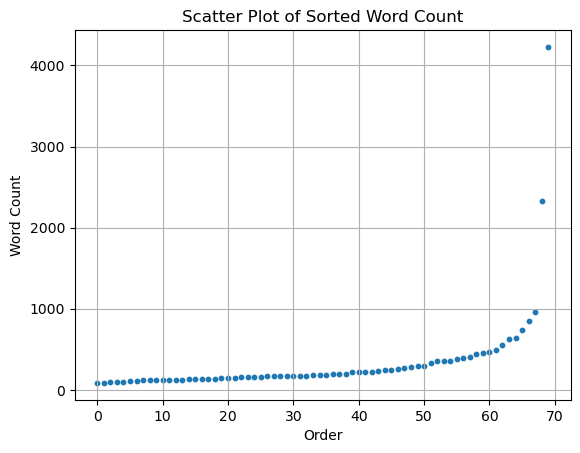

In [19]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by 'Content_Length'
df_sorted = df.sort_values(by='Word_Count').reset_index(drop=True)

# Creating a new column 'Order' that will serve as our new x-axis
df_sorted['Order'] = df_sorted.index

# Creating a scatter plot using the 'Order' as x-axis and sorted 'Content_Length' as y-axis
plt.scatter(df_sorted['Order'], df_sorted['Word_Count'], s=10)
plt.title('Scatter Plot of Sorted Word Count')
plt.xlabel('Order')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

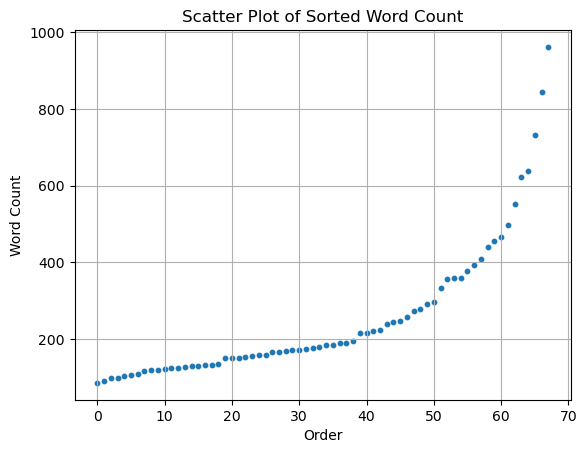

In [22]:
import matplotlib.pyplot as plt

df_filtered = df[df['Word_Count'] <= 1000]

# Sorting the filtered DataFrame by 'Content_Length'
df_sorted = df_filtered.sort_values(by='Word_Count').reset_index(drop=True)

# Creating a new column 'Order' that will serve as our new x-axis
df_sorted['Order'] = df_sorted.index

# Creating a scatter plot using the 'Order' as x-axis and sorted 'Content_Length' as y-axis
plt.scatter(df_sorted['Order'], df_sorted['Word_Count'], s=10)
plt.title('Scatter Plot of Sorted Word Count')
plt.xlabel('Order')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

In [32]:
bins = [0, 250, 500, 750, 1000]

# Categorize the word counts into the defined bins
df['Word_Range'] = pd.cut(df['Word_Count'], bins, right=False, include_lowest=True)

# Count the number of entries in each bin
word_count_distribution = df['Word_Range'].value_counts().sort_index()

# Display the distribution of word counts across the ranges
word_count_distribution

Word_Range
[0, 250)       46
[250, 500)     16
[500, 750)      4
[750, 1000)     2
Name: count, dtype: int64